In [1]:
#importing the xarray package as a simplified variable
import xarray as xr

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
import cartopy.crs as ccrs

In [5]:
import numpy as np

In [6]:
data = '/glade/collections/rda/data/ds633.0/e5.oper.an.sfc/202101/e5.oper.an.sfc.128_167_2t.ll025sc.2021010100_2021013123.nc'

In [7]:
xr.DataArray(data)

<xarray.DataArray ()>
array('/glade/collections/rda/data/ds633.0/e5.oper.an.sfc/202101/e5.oper.an.sfc.128_167_2t.ll025sc.2021010100_2021013123.nc',
      dtype='<U116')

In [8]:
ds = xr.open_dataset(data)

In [9]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 744)
Coordinates:
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * time       (time) datetime64[ns] 2021-01-01 ... 2021-01-31T23:00:00
Data variables:
    VAR_2T     (time, latitude, longitude) float32 ...
    utc_date   (time) int32 ...
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB1 data to netCDF4.
    NETCDF_VERSION:       4.7.4
    CONVERSION_PLATFORM:  Linux r1i4n6 4.12.14-95.51-default #1 SMP Fri Apr 1...
    CONVERSION_DATE:      Fri Apr  2 17:08:42 MDT 2021
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Fri Apr  2 17:08:59 2021: ncks -4 --ppc default=7 e...
    NCO:                  netCDF Operators version 4.9.5 (Homepage = http://n...

In [10]:
ds["VAR_2T"]

<xarray.DataArray 'VAR_2T' (time: 744, latitude: 721, longitude: 1440)>
[772450560 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * time       (time) datetime64[ns] 2021-01-01 ... 2021-01-31T23:00:00
Attributes: (12/14)
    long_name:                     2 metre temperature
    short_name:                    2t
    units:                         K
    original_format:               WMO GRIB 1 with ECMWF local table
    ecmwf_local_table:             128
    ecmwf_parameter:               167
    ...                            ...
    grid_specification:            0.25 degree x 0.25 degree from 90N to 90S ...
    rda_dataset:                   ds633.0
    rda_dataset_url:               https:/rda.ucar.edu/datasets/ds633.0/
    rda_dataset_doi:               DOI: 10.5065/BH6N-5N20
    rda_dataset_group:             ERA5 atmospheric surface analysis [netCDF4]
    number_of_significant_digits:  7

In [11]:
ds.load()
dsnew = ds.where((ds["longitude"]>=-120+360)&(ds["longitude"]<=-65+360)&(ds["latitude"]>=20)&(ds["latitude"]<=50),drop=True)

In [12]:
dsnew

<xarray.Dataset>
Dimensions:    (latitude: 121, longitude: 221, time: 744)
Coordinates:
  * latitude   (latitude) float64 50.0 49.75 49.5 49.25 ... 20.5 20.25 20.0
  * longitude  (longitude) float64 240.0 240.2 240.5 240.8 ... 294.5 294.8 295.0
  * time       (time) datetime64[ns] 2021-01-01 ... 2021-01-31T23:00:00
Data variables:
    VAR_2T     (time, latitude, longitude) float32 271.6 273.1 ... 298.1 298.1
    utc_date   (time, longitude, latitude) float64 2.021e+09 ... 2.021e+09
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB1 data to netCDF4.
    NETCDF_VERSION:       4.7.4
    CONVERSION_PLATFORM:  Linux r1i4n6 4.12.14-95.51-default #1 SMP Fri Apr 1...
    CONVERSION_DATE:      Fri Apr  2 17:08:42 MDT 2021
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Fri Apr  2 17:08:59 2021: ncks -4 --ppc default=7 e...
    NCO:                  netCDF Operators version 4.9.5 (Homepage = http://n...

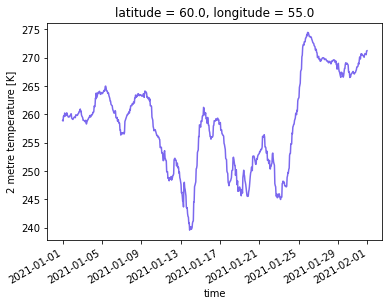

In [13]:
ds["VAR_2T"].isel(longitude=220, latitude=120).plot(color="mediumslateblue")

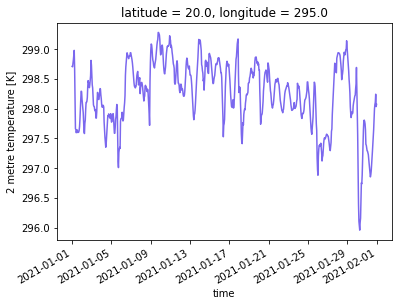

In [14]:
# To plot a graph a t a certain point in time with a given longitude and latitude value
dsnew["VAR_2T"].isel(longitude=220, latitude=120).plot(color="mediumslateblue")

### This is the Lambert Conformal map code

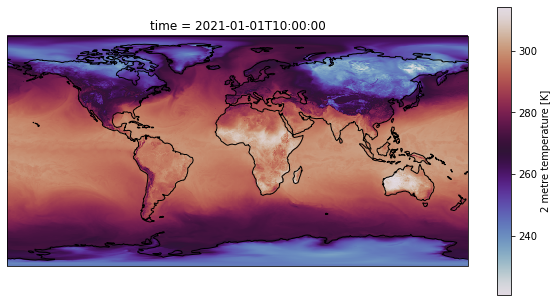

In [15]:
fig = plt.figure(figsize=(8,4))
map_proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)
ax = plt.axes([0., 0., 1., 1.], projection=ccrs.PlateCarree())
p = ds["VAR_2T"].isel(time=10).plot(ax = ax, cmap="twilight", transform=ccrs.PlateCarree())
ax.coastlines()
plt.show()

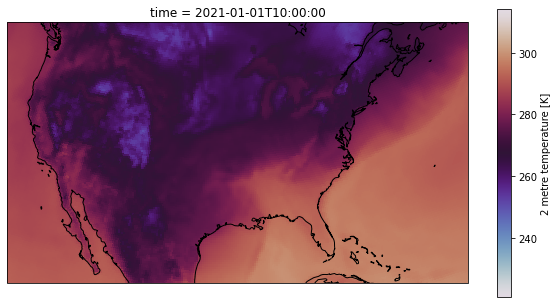

In [16]:
fig = plt.figure(figsize=(8,4))
map_proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)
ax = plt.axes([0., 0., 1., 1.], projection=map_proj)
p = ds["VAR_2T"].isel(time=10).plot(ax = ax, cmap="twilight", transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-120,-65,20,50])
plt.show()

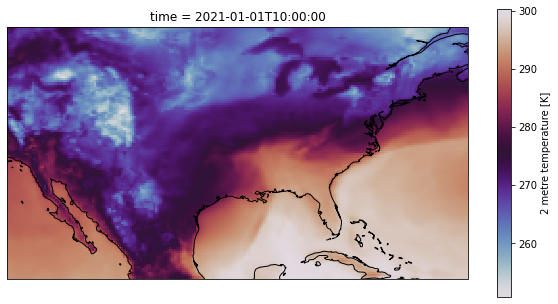

In [17]:
fig = plt.figure(figsize=(8,4))
map_proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)
ax = plt.axes([0., 0., 1., 1.], projection=ccrs.PlateCarree())
p = dsnew["VAR_2T"].isel(time=10).plot(ax = ax, cmap="twilight", transform=ccrs.PlateCarree())
ax.coastlines()
ax.margins(x=0, y=0)
plt.show()

# This is the Plate Carree map Code

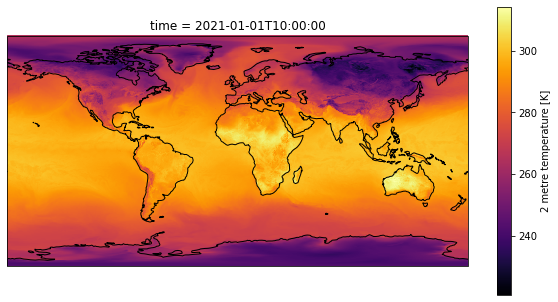

In [18]:
fig = plt.figure(figsize=(8,4))
map_proj = ccrs.PlateCarree(central_longitude=-95)
ax = plt.axes([0., 0., 1., 1.], projection=ccrs.PlateCarree())
p = ds["VAR_2T"].isel(time=10).plot(ax = ax, cmap="inferno", transform=ccrs.PlateCarree())
ax.coastlines()
plt.show()

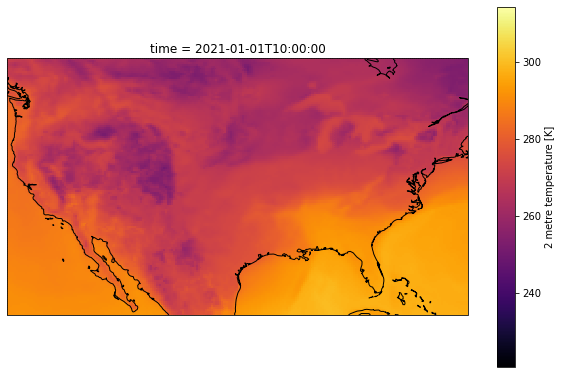

In [19]:
fig = plt.figure(figsize=(8,5))
map_proj = ccrs.PlateCarree(central_longitude=-95)
ax = plt.axes([0., 0., 1., 1.], projection=map_proj)
p = ds["VAR_2T"].isel(time=10).plot(ax = ax, cmap="inferno", transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-125,-70,22.5,50])
plt.show()

### `New dataset to make a new map`

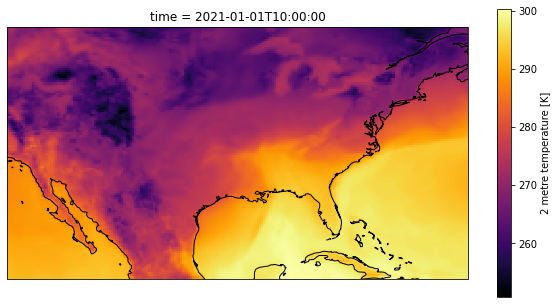

In [20]:
fig = plt.figure(figsize=(8,4))
map_proj = ccrs.PlateCarree(central_longitude=-95)
ax = plt.axes([0., 0., 1., 1.], projection=ccrs.PlateCarree())
p = dsnew["VAR_2T"].isel(time=10).plot(ax = ax, cmap="inferno", transform=ccrs.PlateCarree())
ax.coastlines()
ax.margins(x=0, y=0)
plt.show()

# This is the Mercator map code

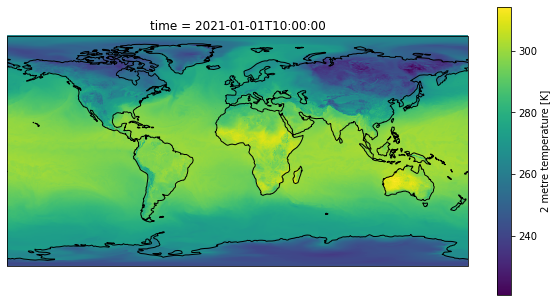

In [21]:
fig = plt.figure(figsize=(8,4))
map_proj = ccrs.Mercator(central_longitude=-95)
ax = plt.axes([0., 0., 1., 1.], projection=ccrs.PlateCarree())
p = ds["VAR_2T"].isel(time=10).plot(ax = ax, cmap="viridis", transform=ccrs.PlateCarree())
ax.coastlines()
plt.show()

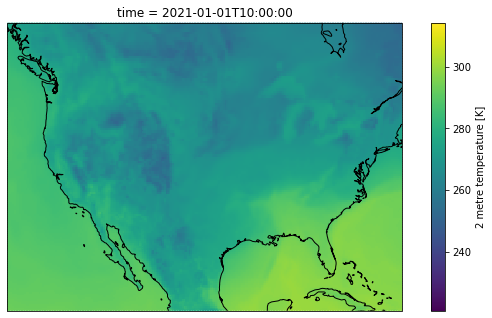

In [22]:
fig = plt.figure(figsize=(8,4))
map_proj = ccrs.Mercator(central_longitude=-95)
ax = plt.axes([0., 0., 1., 1.], projection=map_proj)
p = ds["VAR_2T"].isel(time=10).plot(ax = ax, cmap="viridis", transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-130,-70,20,50])
plt.show()

### `New dataset to make a new map`

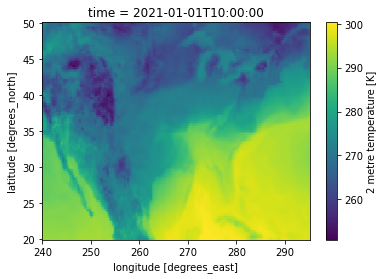

In [23]:
#Plotting latitude and longitude map using a point in time
dsnew["VAR_2T"].isel(time=10).plot(cmap="viridis")

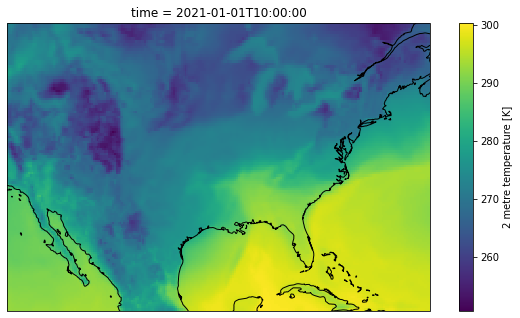

In [24]:
fig = plt.figure(figsize=(8,4))
map_proj = ccrs.Mercator(central_longitude=-95)
ax = plt.axes([0., 0., 1., 1.], projection=map_proj)
p = dsnew["VAR_2T"].isel(time=10).plot(ax = ax, cmap="viridis", transform=ccrs.PlateCarree())
ax.coastlines()
ax.margins(x=0, y=0)
plt.show()

# Graphing data into histograms

(array([4.18204000e+05, 6.01274500e+06, 4.61116620e+07, 1.02920838e+08,
        6.11059670e+07, 1.23751146e+08, 1.11116858e+08, 1.81909105e+08,
        1.37560155e+08, 1.54388000e+06]),
 array([211.08359, 221.94124, 232.79889, 243.65656, 254.5142 , 265.37186,
        276.22952, 287.08716, 297.94482, 308.80246, 319.66013],
       dtype=float32),
 <BarContainer object of 10 artists>)

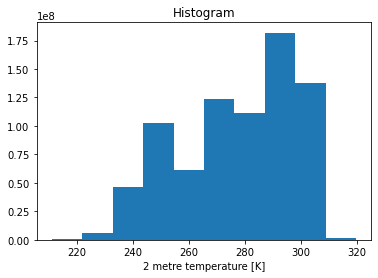

In [25]:
ds["VAR_2T"].plot.hist()

(array([2.415000e+03, 4.741400e+04, 3.914760e+05, 1.329698e+06,
        4.185438e+06, 4.289040e+06, 2.802293e+06, 4.731087e+06,
        2.110690e+06, 5.753000e+03]),
 array([234.70871, 242.3178 , 249.92686, 257.53595, 265.14502, 272.7541 ,
        280.3632 , 287.97226, 295.58133, 303.19043, 310.7995 ],
       dtype=float32),
 <BarContainer object of 10 artists>)

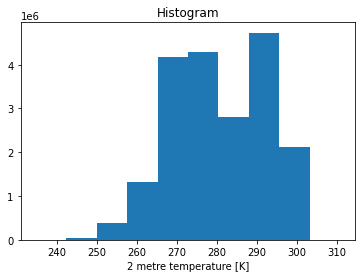

In [26]:
dsnew["VAR_2T"].plot.hist()

# plotting multiple lines of data

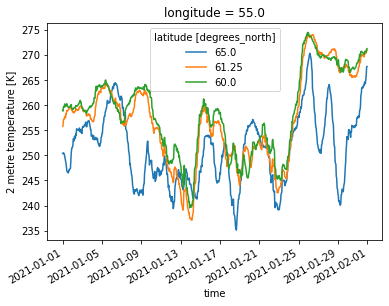

In [27]:
ds["VAR_2T"].isel(longitude=220, latitude=[100,115,120]).plot.line(x="time")

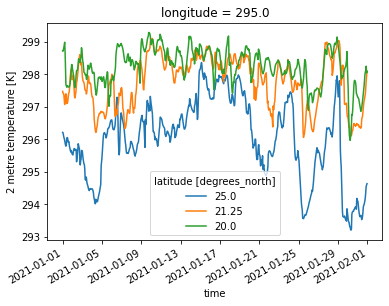

In [28]:
# how to plot 3 different values of latitude at a single longitude over time
dsnew["VAR_2T"].isel(longitude=220, latitude=[100,115,120]).plot.line(x="time")

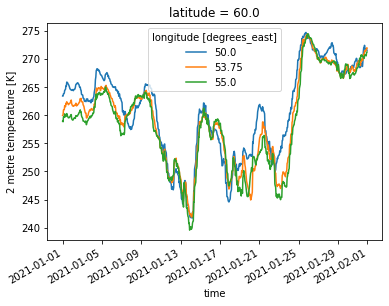

In [29]:
ds["VAR_2T"].isel(longitude=[200,215,220], latitude=120).plot.line(x="time")

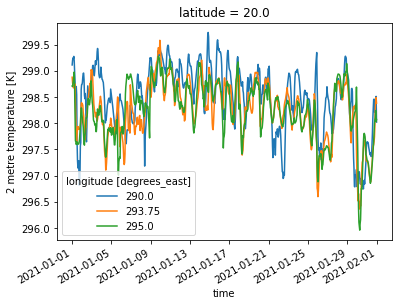

In [30]:
# how to plot 3 different values of longitude at a single latitude over time
dsnew["VAR_2T"].isel(longitude=[200,215,220], latitude=120).plot.line(x="time")

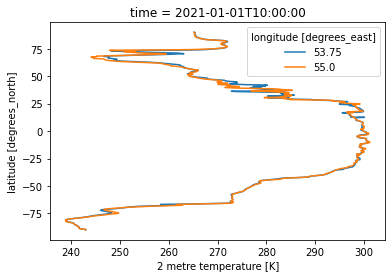

In [31]:
ds["VAR_2T"].isel(time=10, longitude=[215, 220]).plot(y="latitude", hue="longitude")

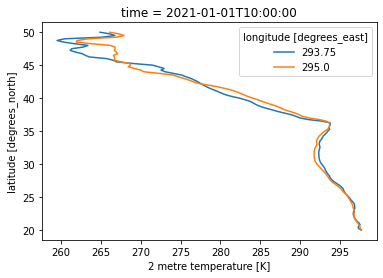

In [32]:
# To plot temperature in a cetain range of longitude at a certain time
dsnew["VAR_2T"].isel(time=10, longitude=[215, 220]).plot(y="latitude", hue="longitude")

# This is 1979 January data practice

In [33]:
data2 = '/glade/collections/rda/data/ds633.0/e5.oper.an.sfc/197901/e5.oper.an.sfc.128_167_2t.ll025sc.1979010100_1979013123.nc'

In [34]:
xr.DataArray(data2)

<xarray.DataArray ()>
array('/glade/collections/rda/data/ds633.0/e5.oper.an.sfc/197901/e5.oper.an.sfc.128_167_2t.ll025sc.1979010100_1979013123.nc',
      dtype='<U116')

In [35]:
es = xr.open_dataset(data2)

In [36]:
es

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 744)
Coordinates:
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * time       (time) datetime64[ns] 1979-01-01 ... 1979-01-31T23:00:00
Data variables:
    VAR_2T     (time, latitude, longitude) float32 ...
    utc_date   (time) int32 ...
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB1 data to netCDF4.
    NETCDF_VERSION:       4.6.1
    CONVERSION_PLATFORM:  Linux casper05 3.10.0-693.21.1.el7.x86_64 #1 SMP We...
    CONVERSION_DATE:      Mon May 13 19:30:10 MDT 2019
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Mon May 13 19:30:40 2019: ncks -4 --ppc default=7 e...
    NCO:                  netCDF Operators version 4.7.4 (http://nco.sf.net)

In [37]:
es["VAR_2T"]

<xarray.DataArray 'VAR_2T' (time: 744, latitude: 721, longitude: 1440)>
[772450560 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * time       (time) datetime64[ns] 1979-01-01 ... 1979-01-31T23:00:00
Attributes: (12/14)
    long_name:                     2 metre temperature
    short_name:                    2t
    units:                         K
    original_format:               WMO GRIB 1 with ECMWF local table
    ecmwf_local_table:             128
    ecmwf_parameter:               167
    ...                            ...
    grid_specification:            0.25 degree x 0.25 degree from 90N to 90S ...
    rda_dataset:                   ds633.0
    rda_dataset_url:               https:/rda.ucar.edu/datasets/ds633.0/
    rda_dataset_doi:               DOI: 10.5065/BH6N-5N20
    rda_dataset_group:             ERA5 atmospheric surface analysis [netCDF4]
    number_of_significant_digits:  7

In [38]:
ds.load()
esnew = es.where((es["longitude"]>=-120+360)&(es["longitude"]<=-65+360)&(es["latitude"]>=20)&(es["latitude"]<=50),drop=True)

In [39]:
esnew

<xarray.Dataset>
Dimensions:    (latitude: 121, longitude: 221, time: 744)
Coordinates:
  * latitude   (latitude) float64 50.0 49.75 49.5 49.25 ... 20.5 20.25 20.0
  * longitude  (longitude) float64 240.0 240.2 240.5 240.8 ... 294.5 294.8 295.0
  * time       (time) datetime64[ns] 1979-01-01 ... 1979-01-31T23:00:00
Data variables:
    VAR_2T     (time, latitude, longitude) float32 244.9 246.6 ... 297.7 297.7
    utc_date   (time, longitude, latitude) float64 1.979e+09 ... 1.979e+09
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB1 data to netCDF4.
    NETCDF_VERSION:       4.6.1
    CONVERSION_PLATFORM:  Linux casper05 3.10.0-693.21.1.el7.x86_64 #1 SMP We...
    CONVERSION_DATE:      Mon May 13 19:30:10 MDT 2019
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Mon May 13 19:30:40 2019: ncks -4 --ppc default=7 e...
    NCO:                  netCDF Operators version 4.7.4 (http://nco.sf.net)

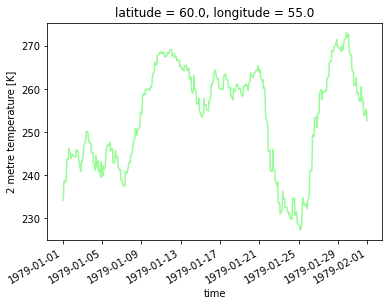

In [40]:
es["VAR_2T"].isel(longitude=220, latitude=120).plot(color="palegreen")

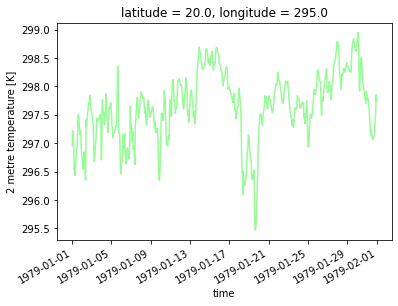

In [41]:
esnew["VAR_2T"].isel(longitude=220, latitude=120).plot(color="palegreen")

# This is the Lambert Conformal map code (1979 data)

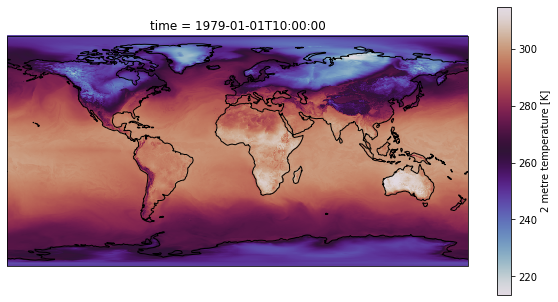

In [42]:
fig = plt.figure(figsize=(8,4))
map_proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)
ax = plt.axes([0., 0., 1., 1.], projection=ccrs.PlateCarree())
p = es["VAR_2T"].isel(time=10).plot(ax = ax, cmap="twilight", transform=ccrs.PlateCarree())
ax.coastlines()
plt.show()

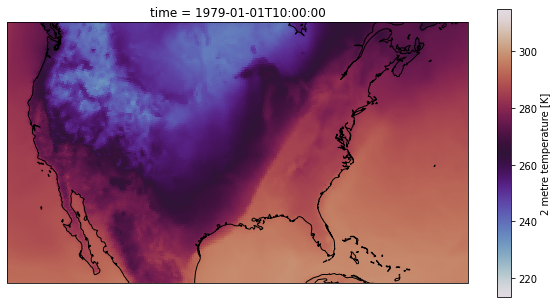

In [43]:
fig = plt.figure(figsize=(8,4))
map_proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)
ax = plt.axes([0., 0., 1., 1.], projection=map_proj)
p = es["VAR_2T"].isel(time=10).plot(ax = ax, cmap="twilight", transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-120,-65,20,50])
plt.show()

### `New dataset to make a new map`

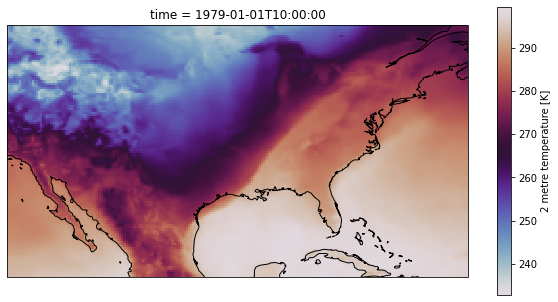

In [44]:
fig = plt.figure(figsize=(8,4))
map_proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)
ax = plt.axes([0., 0., 1., 1.], projection=ccrs.PlateCarree())
p = esnew["VAR_2T"].isel(time=10).plot(ax = ax, cmap="twilight", transform=ccrs.PlateCarree())
ax.coastlines()
ax.margins(x=0, y=0)
plt.show()

# This is the Plate Carree map Code (1979 data)

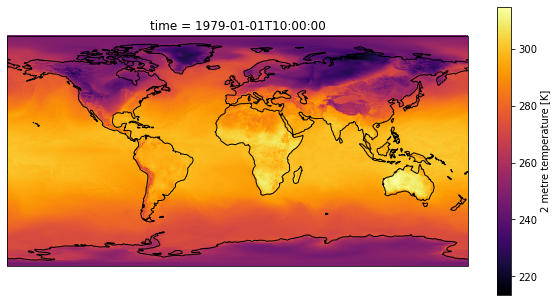

In [45]:
fig = plt.figure(figsize=(8,4))
map_proj = ccrs.PlateCarree(central_longitude=-95)
ax = plt.axes([0., 0., 1., 1.], projection=ccrs.PlateCarree())
p = es["VAR_2T"].isel(time=10).plot(ax = ax, cmap="inferno", transform=ccrs.PlateCarree())
ax.coastlines()
plt.show()

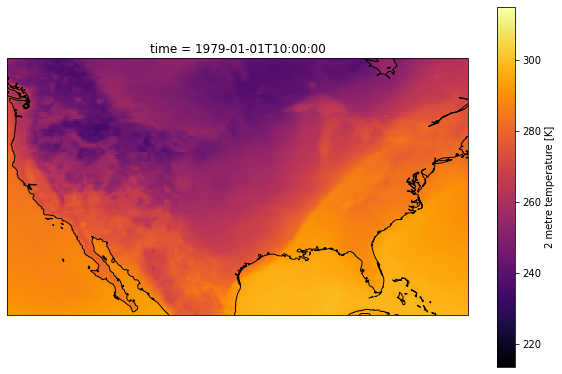

In [46]:
fig = plt.figure(figsize=(8,5))
map_proj = ccrs.PlateCarree(central_longitude=-95)
ax = plt.axes([0., 0., 1., 1.], projection=map_proj)
p = es["VAR_2T"].isel(time=10).plot(ax = ax, cmap="inferno", transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-125,-70,22.5,50])
plt.show()

### `New dataset to make a new map`

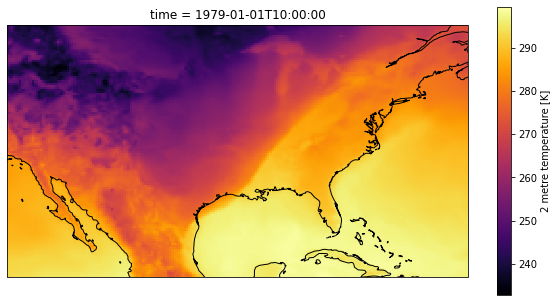

In [47]:
fig = plt.figure(figsize=(8,4))
map_proj = ccrs.PlateCarree(central_longitude=-95)
ax = plt.axes([0., 0., 1., 1.], projection=ccrs.PlateCarree())
p = esnew["VAR_2T"].isel(time=10).plot(ax = ax, cmap="inferno", transform=ccrs.PlateCarree())
ax.coastlines()
ax.margins(x=0, y=0)
plt.show()

# This is the Mercator map code (1979 data)

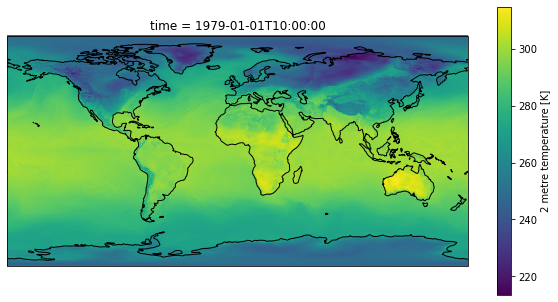

In [48]:
fig = plt.figure(figsize=(8,4))
map_proj = ccrs.Mercator(central_longitude=-95)
ax = plt.axes([0., 0., 1., 1.], projection=ccrs.PlateCarree())
p = es["VAR_2T"].isel(time=10).plot(ax = ax, cmap="viridis", transform=ccrs.PlateCarree())
ax.coastlines()
plt.show()

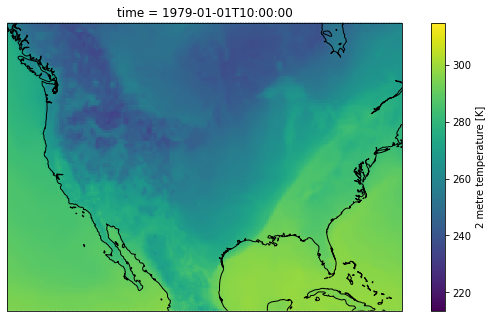

In [49]:
fig = plt.figure(figsize=(8,4))
map_proj = ccrs.Mercator(central_longitude=-95)
ax = plt.axes([0., 0., 1., 1.], projection=map_proj)
p = es["VAR_2T"].isel(time=10).plot(ax = ax, cmap="viridis", transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-130,-70,20,50])
plt.show()

In [50]:
### `New dataset to make a new map`

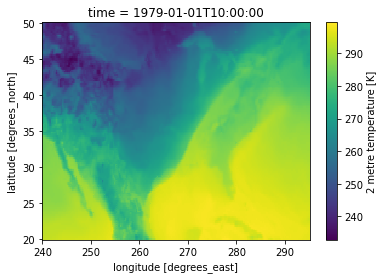

In [51]:
#Plotting latitude and longitude map using a point in time
esnew["VAR_2T"].isel(time=10).plot(cmap="viridis")

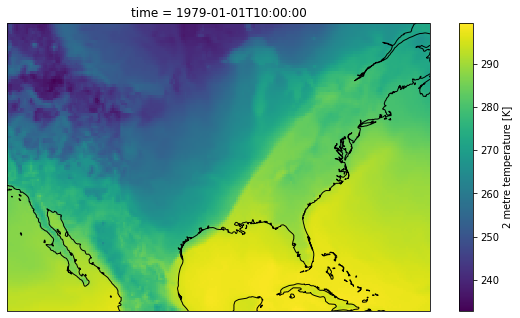

In [52]:
fig = plt.figure(figsize=(8,4))
map_proj = ccrs.Mercator(central_longitude=-95)
ax = plt.axes([0., 0., 1., 1.], projection=map_proj)
p = esnew["VAR_2T"].isel(time=10).plot(ax = ax, cmap="viridis", transform=ccrs.PlateCarree())
ax.coastlines()
ax.margins(x=0, y=0)
plt.show()

# This is 1979 February data practice

In [53]:
data3 = '/glade/collections/rda/data/ds633.0/e5.oper.an.sfc/197902/e5.oper.an.sfc.128_167_2t.ll025sc.1979020100_1979022823.nc'

In [54]:
xr.DataArray(data3)

<xarray.DataArray ()>
array('/glade/collections/rda/data/ds633.0/e5.oper.an.sfc/197902/e5.oper.an.sfc.128_167_2t.ll025sc.1979020100_1979022823.nc',
      dtype='<U116')

In [55]:
fs = xr.open_dataset(data3)

In [56]:
fs

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 672)
Coordinates:
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * time       (time) datetime64[ns] 1979-02-01 ... 1979-02-28T23:00:00
Data variables:
    VAR_2T     (time, latitude, longitude) float32 ...
    utc_date   (time) int32 ...
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB1 data to netCDF4.
    NETCDF_VERSION:       4.6.1
    CONVERSION_PLATFORM:  Linux r2i0n0 3.12.62-60.64.8-default #1 SMP Tue Oct...
    CONVERSION_DATE:      Mon May 13 19:29:32 MDT 2019
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Mon May 13 19:29:45 2019: ncks -4 --ppc default=7 e...
    NCO:                  netCDF Operators version 4.7.4 (http://nco.sf.net)

In [57]:
fs["VAR_2T"]

<xarray.DataArray 'VAR_2T' (time: 672, latitude: 721, longitude: 1440)>
[697697280 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * time       (time) datetime64[ns] 1979-02-01 ... 1979-02-28T23:00:00
Attributes: (12/14)
    long_name:                     2 metre temperature
    short_name:                    2t
    units:                         K
    original_format:               WMO GRIB 1 with ECMWF local table
    ecmwf_local_table:             128
    ecmwf_parameter:               167
    ...                            ...
    grid_specification:            0.25 degree x 0.25 degree from 90N to 90S ...
    rda_dataset:                   ds633.0
    rda_dataset_url:               https:/rda.ucar.edu/datasets/ds633.0/
    rda_dataset_doi:               DOI: 10.5065/BH6N-5N20
    rda_dataset_group:             ERA5 atmospheric surface analysis [netCDF4]
    number_of_significant_digits:  7

In [58]:
fs.load()
fsnew = fs.where((fs["longitude"]>=-120+360)&(fs["longitude"]<=-65+360)&(fs["latitude"]>=20)&(fs["latitude"]<=50),drop=True)

In [59]:
fsnew

<xarray.Dataset>
Dimensions:    (latitude: 121, longitude: 221, time: 672)
Coordinates:
  * latitude   (latitude) float64 50.0 49.75 49.5 49.25 ... 20.5 20.25 20.0
  * longitude  (longitude) float64 240.0 240.2 240.5 240.8 ... 294.5 294.8 295.0
  * time       (time) datetime64[ns] 1979-02-01 ... 1979-02-28T23:00:00
Data variables:
    VAR_2T     (time, latitude, longitude) float32 256.9 259.6 ... 297.3 297.3
    utc_date   (time, longitude, latitude) float64 1.979e+09 ... 1.979e+09
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB1 data to netCDF4.
    NETCDF_VERSION:       4.6.1
    CONVERSION_PLATFORM:  Linux r2i0n0 3.12.62-60.64.8-default #1 SMP Tue Oct...
    CONVERSION_DATE:      Mon May 13 19:29:32 MDT 2019
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Mon May 13 19:29:45 2019: ncks -4 --ppc default=7 e...
    NCO:                  netCDF Operators version 4.7.4 (http://nco.sf.net)

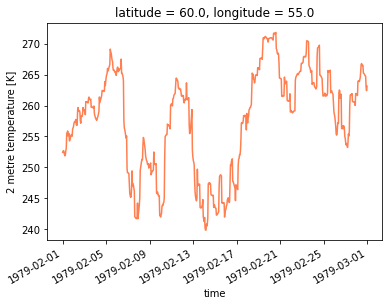

In [60]:
fs["VAR_2T"].isel(longitude=220, latitude=120).plot(color="coral")

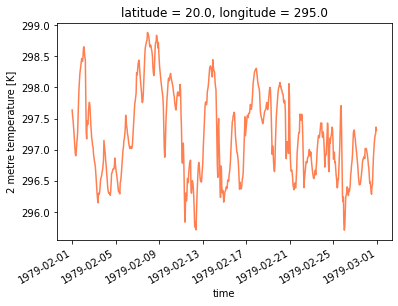

In [61]:
fsnew["VAR_2T"].isel(longitude=220, latitude=120).plot(color="coral")